In [17]:
import pandas as pd
#for building the model and evaluating the model
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler 


df1 = pd.read_csv('advertising.csv')
print(df1.head())

# Define X and y
X = df1[['TV']]
Y = df1['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("Training Features (X_train):", X_train.head())
print("Training Target (y_train):", y_train.head())

print("--------------------------------/n")

# 3. sclae the features
# create a scaler object
scaaler = StandardScaler()
# fit the sclaer on the training data and transform the training data
X_train_scaled = scaaler.fit_transform(X_train)

# transform the test data using the same scaler
X_test_scaled = scaaler.transform(X_test)



# 4. create and train the SDG Regression  model
# max_iter is the number of pages over the training data (epochs)
# tol is the stopping criteration

sgd_model = SGDRegressor(max_iter=5000,random_state=42)
sgd_model.fit(X_train_scaled, y_train)


# access the intercept and coefficients
intercept_value = sgd_model.intercept_
print(f"Intercept: {intercept_value[0]:.4f}")

#access the coefficients
coefficients = sgd_model.coef_

print(f"Coefficients: {coefficients[0]:.4f}")



# rmse value
from sklearn import metrics

y_predict_simple = sgd_model.predict(X_test_scaled)
mse_value = metrics.mean_squared_error(y_test,y_predict_simple)
print(f"MSE Value':{mse_value:4f}")
print(type(mse_value))
rmse_value = np.sqrt(mse_value)
print(f"'RMSE Value':{rmse_value:4f}")




      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
Training Features (X_train):         TV
79   116.0
197  177.0
38    43.1
24    62.3
122  224.0
Training Target (y_train): 79     11.0
197    14.8
38     10.1
24      9.7
122    16.6
Name: Sales, dtype: float64
--------------------------------/n
Intercept: 15.3101
Coefficients: 4.6634
MSE Value':6.094295
<class 'float'>
'RMSE Value':2.468663


In [18]:
# by using multiple linear regression for the sales prediction
import pandas as pd
#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for building the model and evaluating the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np


df1 = pd.read_csv('advertising.csv')
# Define features and target for multiple linear regression
X_multi = df1[['TV', 'Radio', 'Newspaper']]
y_multi = df1['Sales']

# Split the data
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Create and train the model
multi_model = LinearRegression()
multi_model.fit(X_train_multi, y_train_multi)

# Predict on test set
y_pred_multi = multi_model.predict(X_test_multi)

# Evaluate the model
mse_multi = metrics.mean_squared_error(y_test_multi, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
print(f"Multiple Linear Regression MSE: {mse_multi:.4f}")
print(f"Multiple Linear Regression RMSE: {rmse_multi:.4f}")


Multiple Linear Regression MSE: 2.9078
Multiple Linear Regression RMSE: 1.7052


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Load the dataset
df1 = pd.read_csv('advertising.csv')

# Display first few rows
print("First few rows of the dataset:")
print(df1.head())

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Define features and target
X_multi = df1[['TV', 'Radio', 'Newspaper']]
y_multi = df1['Sales']

# Split the dataset
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42)

# Create and train the model
multi_model = LinearRegression()
multi_model.fit(X_train_multi, y_train_multi)

# Predict on the test set
y_pred_multi = multi_model.predict(X_test_multi)

# Evaluate the model
mse_multi = metrics.mean_squared_error(y_test_multi, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
r2_score = multi_model.score(X_test_multi, y_test_multi)

print(f"\nMultiple Linear Regression MSE: {mse_multi:.4f}")
print(f"Multiple Linear Regression RMSE: {rmse_multi:.4f}")
print(f"Multiple Linear Regression R² Score: {r2_score:.4f}")

# Display model coefficients
coeff_df = pd.DataFrame(multi_model.coef_, X_multi.columns, columns=['Coefficient'])
print("\nModel Coefficients:")
print(coeff_df)

# Plot residuals
residuals = y_test_multi - y_pred_multi
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_multi, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Sales")
plt.show()


First few rows of the dataset:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


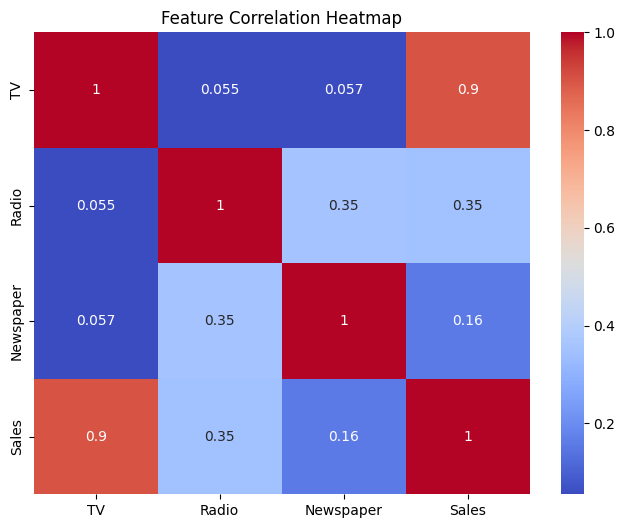


Multiple Linear Regression MSE: 2.9078
Multiple Linear Regression RMSE: 1.7052
Multiple Linear Regression R² Score: 0.9059

Model Coefficients:
           Coefficient
TV            0.054509
Radio         0.100945
Newspaper     0.004337


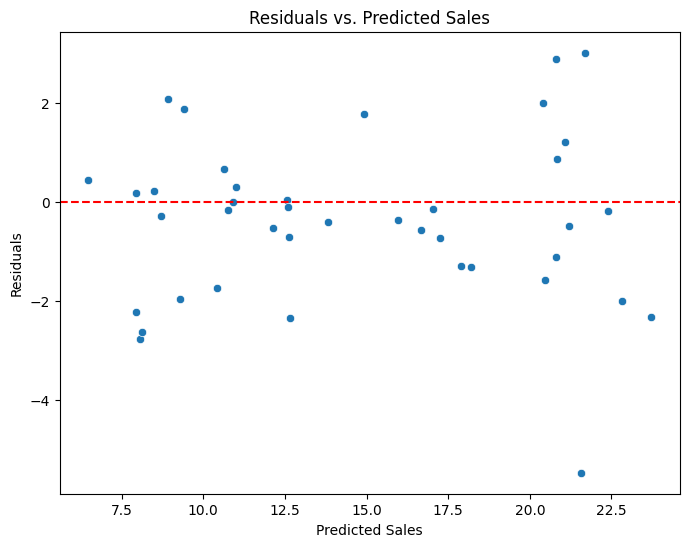

In [19]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Load the dataset
df1 = pd.read_csv('advertising.csv')

# Display first few rows
print("First few rows of the dataset:")
print(df1.head())

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Define features and target
X_multi = df1[['TV', 'Radio', 'Newspaper']]
y_multi = df1['Sales']

# Split the dataset
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42)

# Create and train the model
multi_model = LinearRegression()
multi_model.fit(X_train_multi, y_train_multi)

# Predict on the test set
y_pred_multi = multi_model.predict(X_test_multi)

# Evaluate the model
mse_multi = metrics.mean_squared_error(y_test_multi, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
r2_score = multi_model.score(X_test_multi, y_test_multi)

print(f"\nMultiple Linear Regression MSE: {mse_multi:.4f}")
print(f"Multiple Linear Regression RMSE: {rmse_multi:.4f}")
print(f"Multiple Linear Regression R² Score: {r2_score:.4f}")

# Display model coefficients
coeff_df = pd.DataFrame(multi_model.coef_, X_multi.columns, columns=['Coefficient'])
print("\nModel Coefficients:")
print(coeff_df)

# Plot residuals
residuals = y_test_multi - y_pred_multi
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_multi, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Sales")
plt.show()
